<a href="https://colab.research.google.com/github/Lafri-13/Analysing-Tropospheric-Formaldehyde-HCHO-gas-in-Sri-Lanka/blob/main/Analysis_HCHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries and Datasets

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df_col_mat_nuw = pd.read_csv('/content/drive/MyDrive/CM2606-CW-Datasets/col_mat_nuw_output.csv')
df_kan = pd.read_csv('/content/drive/MyDrive/CM2606-CW-Datasets/kan_output.csv')
df_mon_kur_jaf = pd.read_csv('/content/drive/MyDrive/CM2606-CW-Datasets/mon_kur_jaf_output.csv')

# Descriptive analysis

In [87]:
print(df_col_mat_nuw.shape)
df_col_mat_nuw.info()

(5477, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   0.00019698343957810148  3058 non-null   float64
 1   Colombo Proper          5477 non-null   object 
 2   2019-01-01              5477 non-null   object 
 3   2019-01-02              5477 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [88]:
print(df_kan.shape)
df_kan.info()

(1825, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   0.00017607134598773356  1032 non-null   float64
 1   Kandy Proper            1825 non-null   object 
 2   2019-01-01              1825 non-null   object 
 3   2019-01-02              1825 non-null   object 
dtypes: float64(1), object(3)
memory usage: 57.2+ KB


In [89]:
print(df_mon_kur_jaf.shape)
df_mon_kur_jaf.info()

(5477, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3826 non-null   float64
 1   Bibile, Monaragala  5477 non-null   object 
 2   2019-01-01          5477 non-null   object 
 3   2019-01-02          5477 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [90]:
df_col_mat_nuw.head()

,0.00019698343957810148,Colombo Proper,2019-01-01,2019-01-02
0,0.000263,Colombo Proper,2019-01-02,2019-01-03
1,0.000099,Colombo Proper,2019-01-03,2019-01-04
2,0.000210,Colombo Proper,2019-01-04,2019-01-05
3,0.000179,Colombo Proper,2019-01-05,2019-01-06
4,0.000108,Colombo Proper,2019-01-06,2019-01-07


In [91]:
df_kan.head()

,0.00017607134598773356,Kandy Proper,2019-01-01,2019-01-02
0,0.000092,Kandy Proper,2019-01-02,2019-01-03
1,NaN,Kandy Proper,2019-01-03,2019-01-04
2,0.000191,Kandy Proper,2019-01-04,2019-01-05
3,0.000122,Kandy Proper,2019-01-05,2019-01-06
4,-0.000065,Kandy Proper,2019-01-06,2019-01-07


In [92]:
df_mon_kur_jaf.head()

,Unnamed: 0,"Bibile, Monaragala",2019-01-01,2019-01-02
0,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
1,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
2,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
3,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
4,0.000146,"Bibile, Monaragala",2019-01-06,2019-01-07


In [93]:
df_col_mat_nuw.describe()

,0.00019698343957810148
count,3058.000000
mean,0.000120
std,0.000101
min,-0.000259
25%,0.000053
50%,0.000111
75%,0.000176
max,0.000900


In [94]:
df_kan.describe()

,0.00017607134598773356
count,1032.000000
mean,0.000106
std,0.000092
min,-0.000300
25%,0.000050
50%,0.000106
75%,0.000161
max,0.000705


In [95]:
df_mon_kur_jaf.describe()

,Unnamed: 0
count,3826.000000
mean,0.000122
std,0.000087
min,-0.000352
25%,0.000068
50%,0.000114
75%,0.000172
max,0.000584


In [96]:
df_col_mat_nuw.isnull().sum()

0.00019698343957810148    2419
Colombo Proper               0
2019-01-01                   0
2019-01-02                   0
dtype: int64

In [97]:
df_kan.isnull().sum()

0.00017607134598773356    793
Kandy Proper                0
2019-01-01                  0
2019-01-02                  0
dtype: int64

In [98]:
df_mon_kur_jaf.isnull().sum()

Unnamed: 0            1651
Bibile, Monaragala       0
2019-01-01               0
2019-01-02               0
dtype: int64

In [99]:
df_col_mat_nuw.duplicated().sum()

0

In [100]:
df_kan.duplicated().sum()

0

In [101]:
df_mon_kur_jaf.duplicated().sum()

0

## Observations


1. No column Names.
2. Column data points and  data types are same for all three datasets.
3. Date is not in the datatime data type.
4. Null values are there.
5. No duplicates found.

## Adding column names and merging all three datasets to do the data analysis

In [102]:
# naming the columns
df_col_mat_nuw.columns = ['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df_col_mat_nuw.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000263,Colombo Proper,2019-01-02,2019-01-03
1,0.000099,Colombo Proper,2019-01-03,2019-01-04
2,0.000210,Colombo Proper,2019-01-04,2019-01-05
3,0.000179,Colombo Proper,2019-01-05,2019-01-06
4,0.000108,Colombo Proper,2019-01-06,2019-01-07


In [103]:
# naming the columns
df_kan.columns = ['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df_kan.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000092,Kandy Proper,2019-01-02,2019-01-03
1,NaN,Kandy Proper,2019-01-03,2019-01-04
2,0.000191,Kandy Proper,2019-01-04,2019-01-05
3,0.000122,Kandy Proper,2019-01-05,2019-01-06
4,-0.000065,Kandy Proper,2019-01-06,2019-01-07


In [104]:
# naming the columns
df_mon_kur_jaf.columns = ['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df_mon_kur_jaf.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
1,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
2,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
3,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
4,0.000146,"Bibile, Monaragala",2019-01-06,2019-01-07


In [105]:
# Merging all datasets
df_sl_cities = pd.concat([df_col_mat_nuw, df_kan, df_mon_kur_jaf], axis=0)
df_sl_cities.shape

(12779, 4)

In [106]:
# changing the Dates to datetime from int
df_sl_cities['Current_Date'] = pd.to_datetime(df_sl_cities['Current_Date'])
df_sl_cities['Next_Date'] = pd.to_datetime(df_sl_cities['Next_Date'])
df_sl_cities.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000263,Colombo Proper,2019-01-02,2019-01-03
1,0.000099,Colombo Proper,2019-01-03,2019-01-04
2,0.000210,Colombo Proper,2019-01-04,2019-01-05
3,0.000179,Colombo Proper,2019-01-05,2019-01-06
4,0.000108,Colombo Proper,2019-01-06,2019-01-07


In [107]:
df_sl_cities["Current_Date"].describe()

<ipython-input-107-f09373b0ad39>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_sl_cities["Current_Date"].describe()


count                   12779
unique                   1826
top       2019-01-02 00:00:00
freq                        7
first     2019-01-01 00:00:00
last      2023-12-31 00:00:00
Name: Current_Date, dtype: object

In [108]:
df_sl_cities["Next_Date"].describe()

<ipython-input-108-fa22fe13d5ef>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_sl_cities["Next_Date"].describe()


count                   12779
unique                   1826
top       2019-01-03 00:00:00
freq                        7
first     2019-01-02 00:00:00
last      2024-01-01 00:00:00
Name: Next_Date, dtype: object

In [109]:
df_sl_cities["HCHO_reading"].describe()

count    7916.000000
mean        0.000119
std         0.000093
min        -0.000352
25%         0.000061
50%         0.000112
75%         0.000172
max         0.000900
Name: HCHO_reading, dtype: float64

# Statistical Analysis

Only the HCHO reading got a float value

In [110]:
# Finding the median
print("----- Median ------")
df_sl_cities["HCHO_reading"].median()

----- Median ------


0.00011201962628275

In [111]:
max_reading = df_sl_cities["HCHO_reading"].max()
min_reading = df_sl_cities["HCHO_reading"].min()
range = max_reading - min_reading
print("Max = ", max_reading)
print("Min = ", min_reading)
print("----- Range of HCHO Reading ------")
print(range)

Max =  0.0008997101837438
Min =  -0.0003524730243572
----- Range of HCHO Reading ------
0.001252183208101


In [112]:
df_sl_cities_groups = df_sl_cities.groupby("Location")

In [113]:
print("----- Median of HCHO Reading for each city ------")
df_sl_cities_groups["HCHO_reading"].median()

----- Median of HCHO Reading for each city ------


Location
Bibile, Monaragala     0.000125
Colombo Proper         0.000151
Deniyaya, Matara       0.000081
Jaffna Proper          0.000102
Kandy Proper           0.000106
Kurunegala Proper      0.000127
Nuwara Eliya Proper    0.000082
Name: HCHO_reading, dtype: float64

In [114]:
range_group = df_sl_cities_groups['HCHO_reading'].max() - df_sl_cities_groups['HCHO_reading'].min()
print("----- Range of HCHO Reading for each city ------")
range_group

----- Range of HCHO Reading for each city ------


Location
Bibile, Monaragala     0.000774
Colombo Proper         0.000879
Deniyaya, Matara       0.001159
Jaffna Proper          0.000936
Kandy Proper           0.001005
Kurunegala Proper      0.000660
Nuwara Eliya Proper    0.000598
Name: HCHO_reading, dtype: float64

In [115]:
# Statistic of each city
print("------ Statistic of of HCHO Reading for each city ------")
df_sl_cities_groups['HCHO_reading'].describe()

------ Statistic of of HCHO Reading for each city ------


,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
"Bibile, Monaragala",1131.0,0.000126,0.000094,-0.000239,0.000069,0.000125,0.000185,0.000535
Colombo Proper,1338.0,0.000159,0.000099,-0.000229,0.000093,0.000151,0.000221,0.000650
"Deniyaya, Matara",979.0,0.000092,0.000097,-0.000259,0.000037,0.000081,0.000139,0.000900
Jaffna Proper,1461.0,0.000109,0.000078,-0.000352,0.000063,0.000102,0.000146,0.000584
Kandy Proper,1032.0,0.000106,0.000092,-0.000300,0.000050,0.000106,0.000161,0.000705
Kurunegala Proper,1234.0,0.000134,0.000087,-0.000157,0.000078,0.000127,0.000186,0.000503
Nuwara Eliya Proper,741.0,0.000088,0.000084,-0.000179,0.000034,0.000082,0.000136,0.000419


In [116]:
df_sl_cities_groups.corr()

<ipython-input-116-d8299fb1b701>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sl_cities_groups.corr()


,,HCHO_reading
Location,,
"Bibile, Monaragala",HCHO_reading,1.0
Colombo Proper,HCHO_reading,1.0
"Deniyaya, Matara",HCHO_reading,1.0
Jaffna Proper,HCHO_reading,1.0
Kandy Proper,HCHO_reading,1.0
Kurunegala Proper,HCHO_reading,1.0
Nuwara Eliya Proper,HCHO_reading,1.0


In [117]:
df_sl_cities_groups.cov()

<ipython-input-117-066a71435dc3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cov is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sl_cities_groups.cov()


,,HCHO_reading
Location,,
"Bibile, Monaragala",HCHO_reading,8.840233e-09
Colombo Proper,HCHO_reading,9.864379e-09
"Deniyaya, Matara",HCHO_reading,9.443500e-09
Jaffna Proper,HCHO_reading,6.153356e-09
Kandy Proper,HCHO_reading,8.472231e-09
Kurunegala Proper,HCHO_reading,7.529684e-09
Nuwara Eliya Proper,HCHO_reading,6.999427e-09


# Visualizing Data distrbution

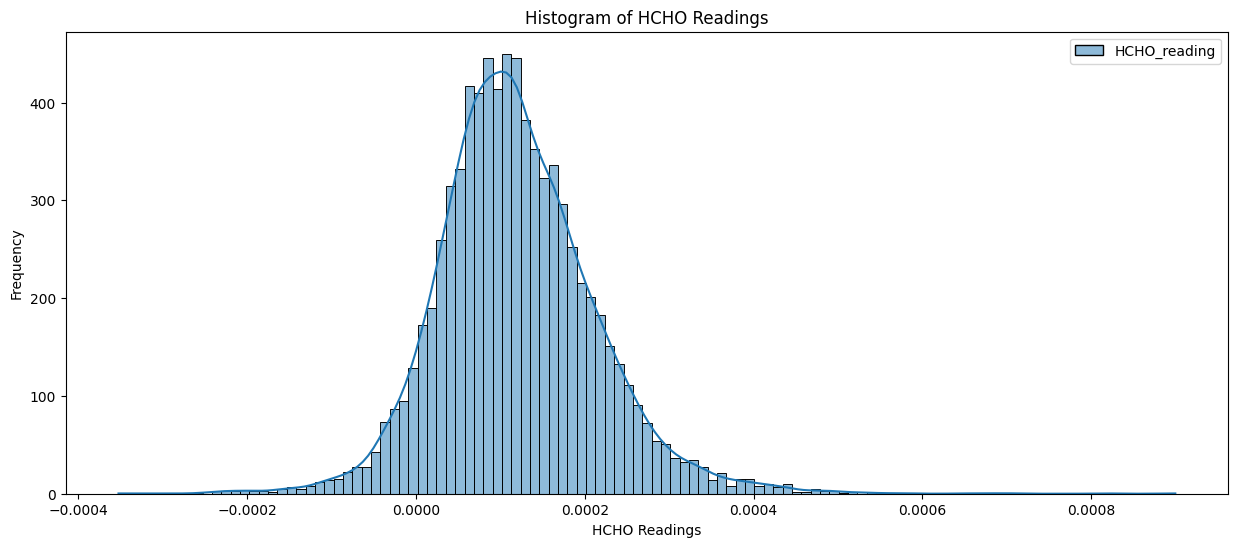

In [118]:
# Histogram for HCHO Readings

plt.figure(figsize=(15,6))
sns.histplot(data = df_sl_cities, kde=True)
plt.title('Histogram of HCHO Readings')
plt.xlabel('HCHO Readings')
plt.ylabel('Frequency')
plt.show()

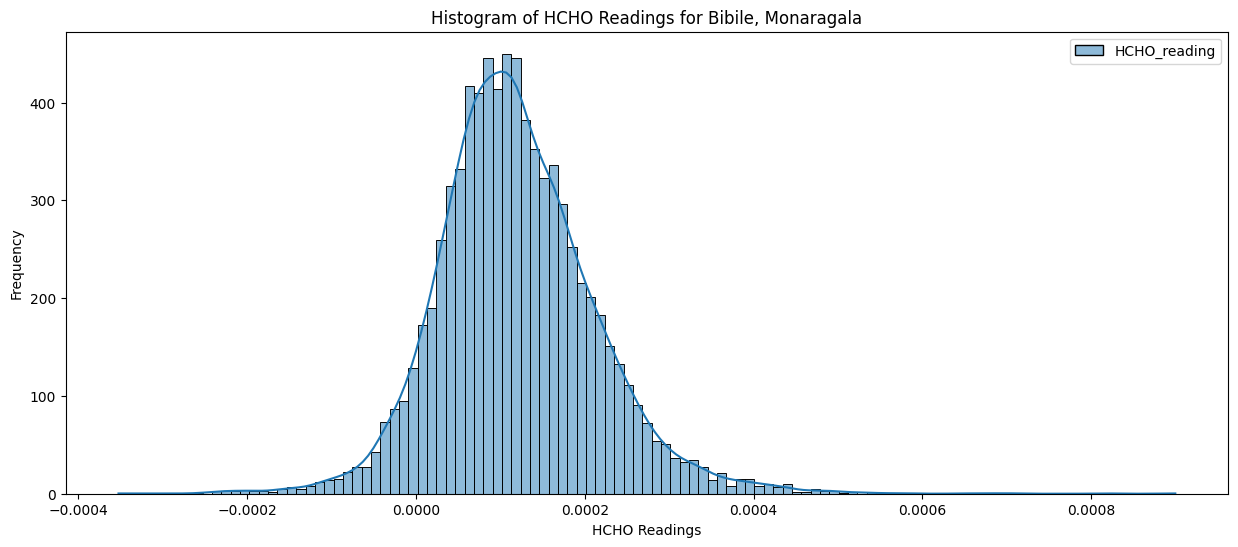

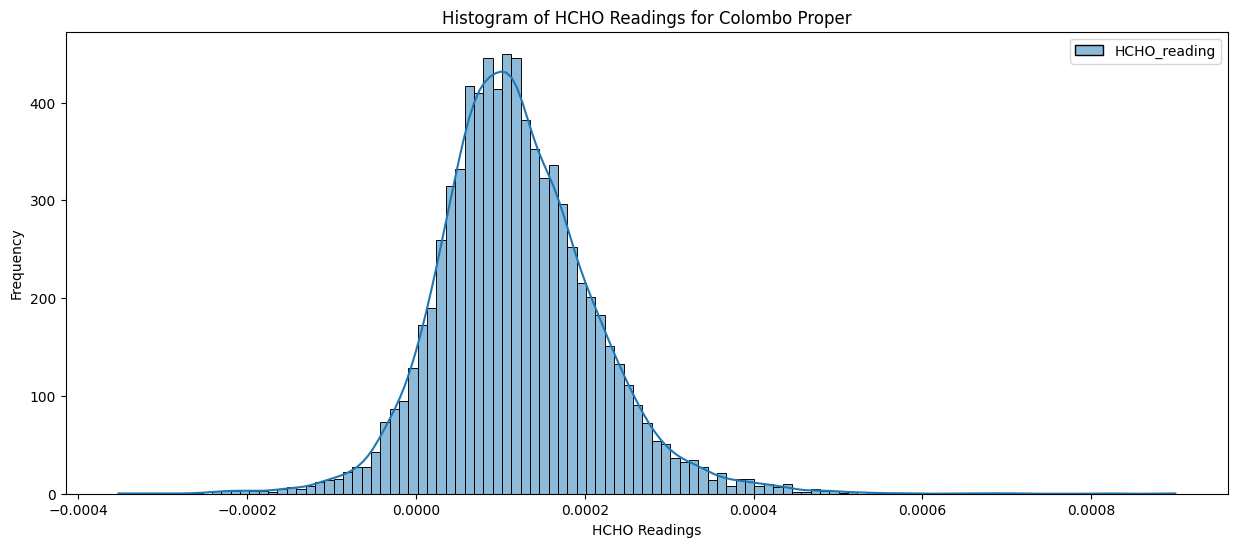

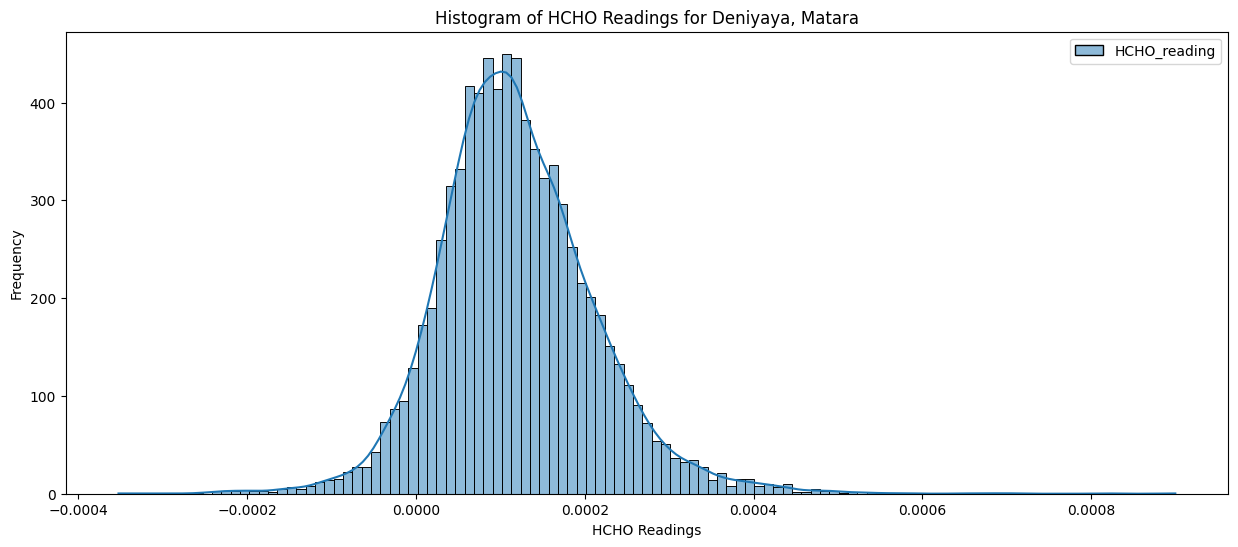

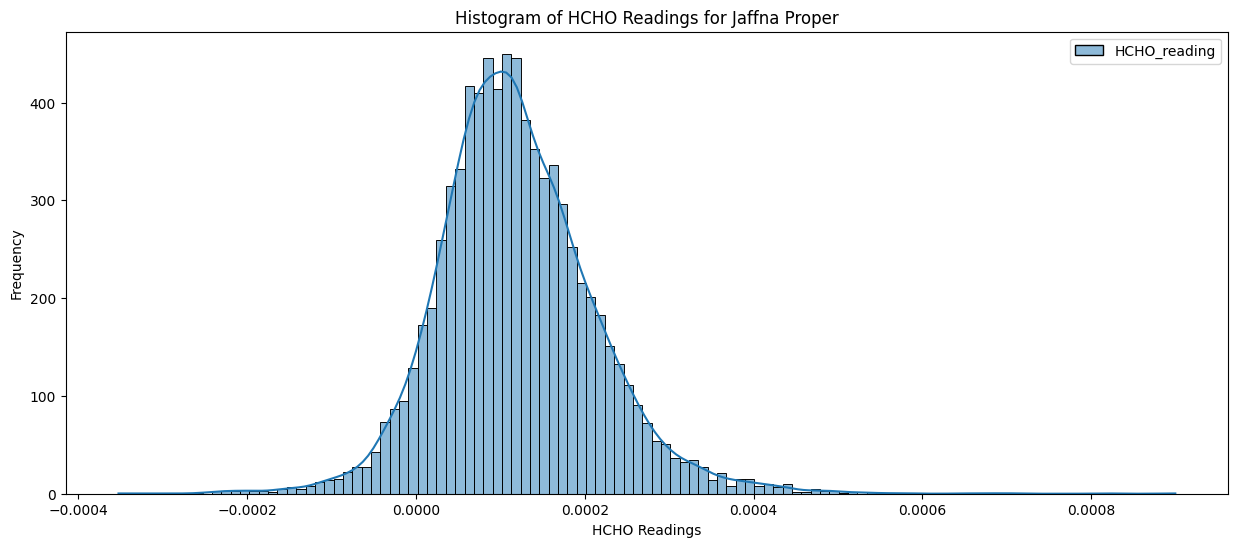

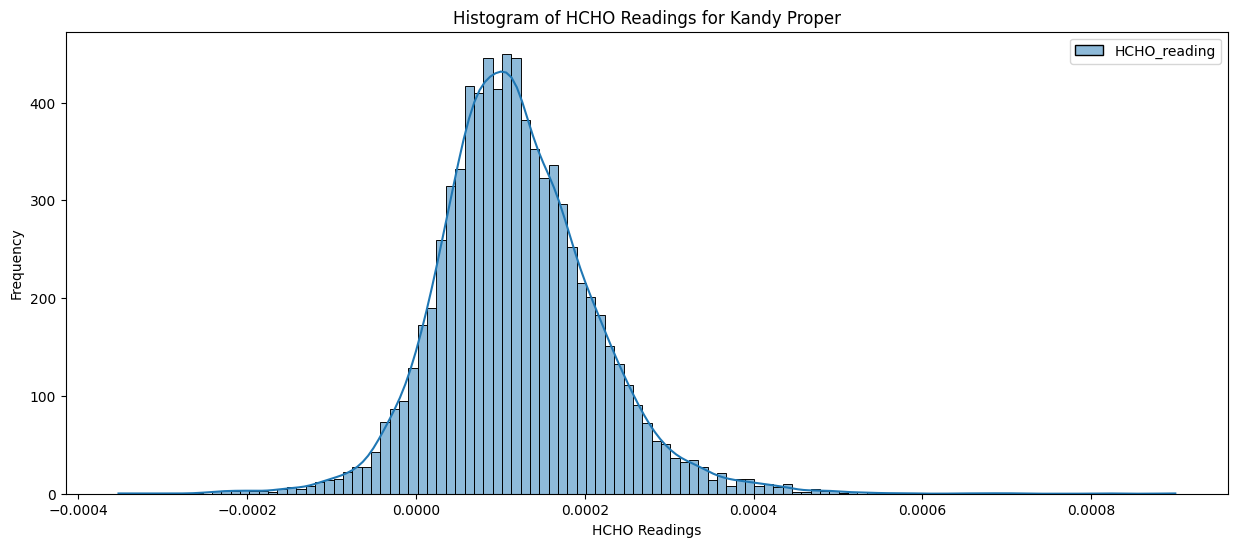

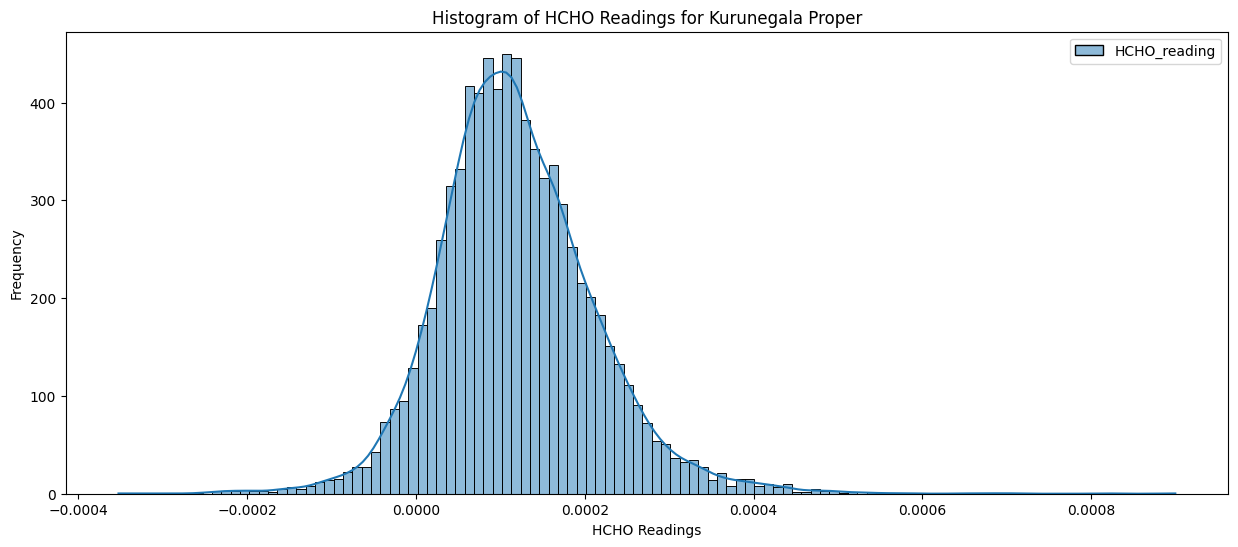

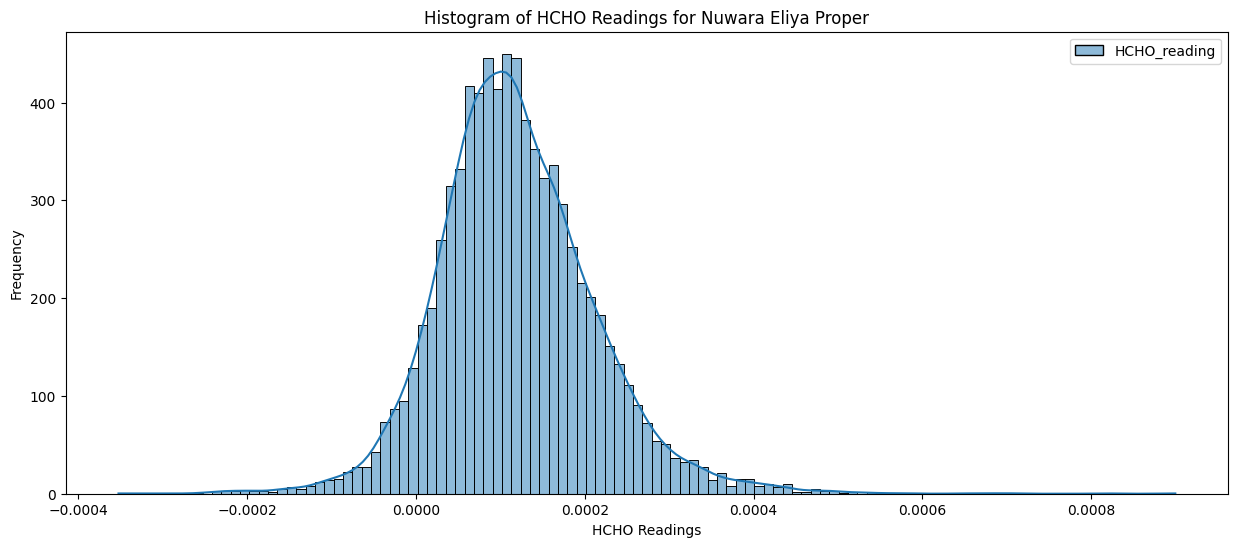

In [119]:
# Histogram of HCHO Readings for each city
for location, grouped_data in df_sl_cities_groups:

  plt.figure(figsize=(15,6))
  sns.histplot(data = df_sl_cities, kde=True)
  plt.title(f'Histogram of HCHO Readings for {location}')
  plt.xlabel('HCHO Readings')
  plt.ylabel('Frequency')
  plt.show()

# Data Preprocessing

In [120]:
df_sl_cities.isnull().sum()

HCHO_reading    4863
Location           0
Current_Date       0
Next_Date          0
dtype: int64

Interpolate is used in a  dataset with Time series .So used interpolate in the same city group because other cities can have a lot more different HCHO values.

In [121]:
# Reset Index before handling the null value
df_sl_cities.reset_index(drop=True, inplace=True)

# useing interpolate
df_sl_cities['HCHO_reading'] = df_sl_cities_groups['HCHO_reading'].transform(lambda x: x.interpolate(method='linear'))

print('____________________________________________________________')

df_sl_cities.isnull().sum()

____________________________________________________________


HCHO_reading    3
Location        0
Current_Date    0
Next_Date       0
dtype: int64

Forward fill to remaining null values

In [122]:
df_sl_cities['HCHO_reading'] = df_sl_cities['HCHO_reading'].fillna(method='ffill')
df_sl_cities.isnull().sum()

HCHO_reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

### Boxplots to find outliers

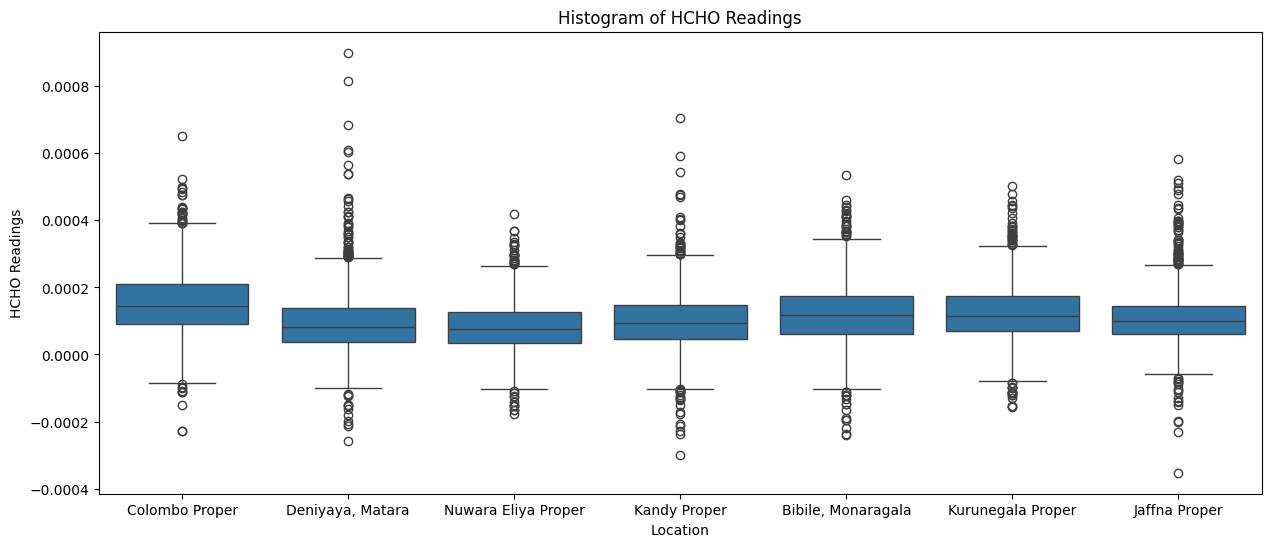

In [123]:
# Boxplots for HCHO Readings

plt.figure(figsize=(15,6))
sns.boxplot(x='Location', y='HCHO_reading', data = df_sl_cities)
plt.title('Histogram of HCHO Readings')
plt.ylabel('HCHO Readings')
plt.xlabel('Location')
plt.show()

In [124]:
 df_sl_cities_group1 = df_sl_cities.groupby("Location")

In [125]:
Q1 = df_sl_cities_group1['HCHO_reading'].quantile(0.25)
Q3 = df_sl_cities_group1['HCHO_reading'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_sl_cities['HCHO_reading'] = df_sl_cities_group1['HCHO_reading'].transform(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]))
print("______________________________________________________________________")
df_sl_cities.shape

______________________________________________________________________


(12779, 4)

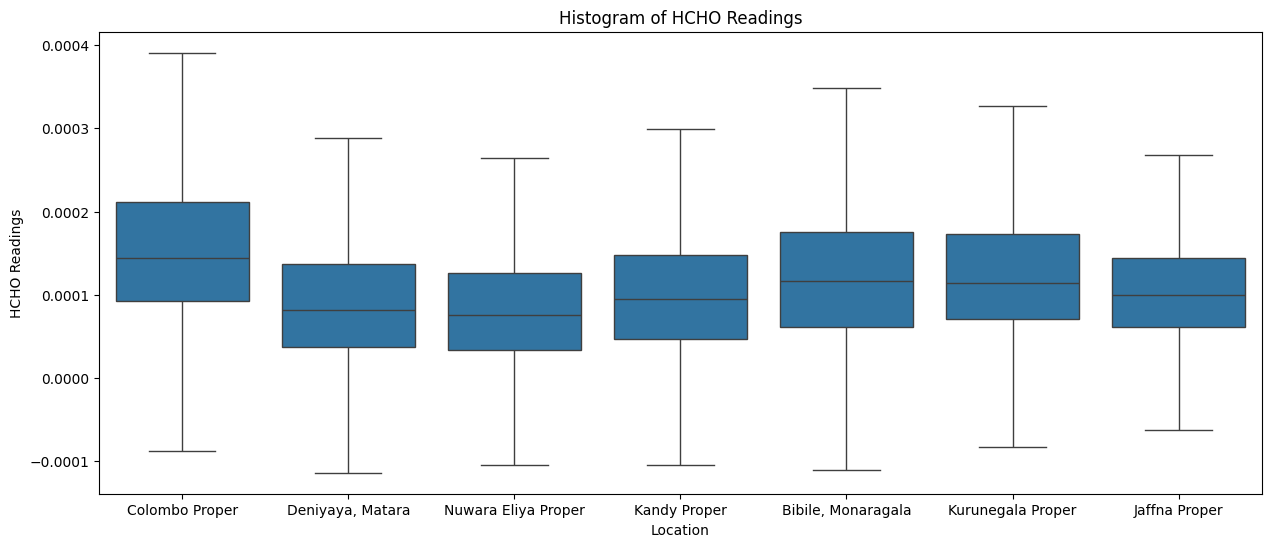

In [126]:
# Boxplots for HCHO Readings

plt.figure(figsize=(15,6))
sns.boxplot(x='Location', y='HCHO_reading', data = df_sl_cities)
plt.title('Histogram of HCHO Readings')
plt.ylabel('HCHO Readings')
plt.xlabel('Location')
plt.show()